## **数据分析之前的步骤**

### 导入相关库

In [1]:
# 数据处理包
import numpy as np
import pandas as pd
import random
import itertools
from scipy import stats
from scipy.sparse import hstack

# 数据可视化包
import matplotlib.pyplot as plt
import seaborn as sns

# 其他
from tqdm import tqdm
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(palette='muted', style='whitegrid')
np.random.seed(13154)

### 导入数据查看信息

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print("训练集样本数为%i个，变量列数为%i个。" % (train.shape[0], train.shape[1]))
print("测试集样本数为%i个，变量列数为%i个。" % (test.shape[0], test.shape[1]))

训练集样本数为76020个，变量列数为371个。
测试集样本数为75818个，变量列数为370个。


### 查看数据

In [3]:
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [5]:
train.sample(10)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
5542,11093,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
56077,111916,2,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77015.550000,0
75293,150363,2,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,347472.600000,0
21434,42925,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32620.590000,0
16658,33406,2,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40085.580000,0
62392,124584,1,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
71907,143534,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93703.710000,0
52794,105370,2,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113208.450000,0
38938,77941,2,24,0.0,0.0,377.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
18393,36851,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,721053.510000,0


In [6]:
test.sample(10)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
49348,98849,2,53,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131908.200000
18982,37902,2,23,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49916.370000
57955,116150,2,32,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68840.400000
66748,133744,2,27,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115201.320000
21974,43904,2,39,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125803.830000
12134,24230,2,27,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
66484,133222,2,25,0.0,0.0,71.85,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,351205.860000
62358,124940,2,43,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136305.330000
3632,7256,2,32,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,183696.270000
40118,80211,2,33,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106319.760000


In [7]:
train.tail()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0
76019,151838,2,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [8]:
test.tail()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
75813,151831,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40243.200000
75814,151832,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,146961.300000
75815,151833,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167299.770000
75816,151834,2,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
75817,151837,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


发现问题：
通过初步查看训练集和测试集的数据具体形式，发现在数据中可能存在纯零列，下面进行数据清晰的时候可以搜索删除掉。

## **探索性数据分析（EDA)**

### 一、描述性统计

由于题目中说全部都是数值型数据，所以可以先进行描述性统计看看内容。

In [9]:
train.describe().round(3).T.to_csv("train_describe.csv")

### 二、简单处理数据

#### 1.处理缺失数据

In [10]:
print("训练集缺失值数量和：%i" % (train.isnull().sum().sum()))
print("测试集缺失值数量和：%i" % (test.isnull().sum().sum()))

训练集缺失值数量和：0
测试集缺失值数量和：0


检测训练集和测试集均无缺失值，所以这一部分可以不做处理。

#### 2. 异常值问题

根据题目背景的题型，**某些异常值可能正是客户不满意的结果**，如果删除他们，可能会使得某些特性模型无法捕捉，也就失去了预测的意义。所以此处不做异常值处理。

#### 3. 处理稀疏数据

上面说过，有很多存在零的变量。现在我们来处理这一部分数据，思路如下：

整体思路：
1. 在这里设置一个阈值，如果某列的96%都是0值的话，则认定为稀疏性数据，这个96%的来源是，target列中0（满意的客户）所占比例大约96%（在kaggle的 [数据] 的地方大致浏览了数据分布）。
2. 而直接删除数据过于简单无脑，因为target中我们所关注的值为“1”的数据，也就是不满意的客户所占比例也很少约3%。那么我们可以先找出稀疏列，然后在看看里面有哪些列时根据target列改变而改变，由此可以科学的认为这种列，可以保留下来。

具体思路：
- 遍历所有列。
- 找到所有99%都是0的列。
- 将这些列与target列对比。
- 如果当target列=“1”时，稀疏列≠“0”的情况超过70%，则保留该列；否则删除该列。

In [11]:
def filter_sparse_features_fixed(df, target_col, threshold=0.96, importance_threshold=0.7):
    # 复制数据集以避免原始数据被修改
    df_filtered = df.copy()
    
    # 获取所有列名称
    columns = df.columns.tolist()
    
    # 初始化删除的变量个数和被保留的变量列表
    deleted_features = 0
    retained_features = []

    # 遍历所有列
    for col in columns:
        # 跳过目标列
        if col == target_col:
            continue
        
        # 检查列是否为稀疏特征（96%为0）
        zero_ratio = df[col].value_counts(normalize=True).get(0, 0)
        if zero_ratio >= threshold:
            # 当target=1时，该列非零的个数
            non_zero_count_when_target_one = (df[col] != 0)[df[target_col] == 1].sum()
            
            # 该列中非零的总个数
            non_zero_count_total = (df[col] != 0).sum()
            
            # 如果非零总个数不为零，则计算比例
            if non_zero_count_total > 0:
                ratio = non_zero_count_when_target_one / non_zero_count_total
                # 如果比例大于70%，则保留该列
                if ratio > importance_threshold:
                    retained_features.append(col)
                else:
                    df_filtered.drop(col, axis=1, inplace=True)
                    deleted_features += 1
            else:
                # 如果非零总个数为零，则删除该列
                df_filtered.drop(col, axis=1, inplace=True)
                deleted_features += 1
    
    print(f"删除的变量个数: {deleted_features}")
    print(f"被保留的变量（虽然0占比超过了96%但被保留）: {retained_features}")
    return df_filtered

# 应用过滤函数并打印详细信息
filtered_df_fixed = filter_sparse_features_fixed(train, 'TARGET')
filtered_df_fixed

删除的变量个数: 264
被保留的变量（虽然0占比超过了96%但被保留）: []


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,...,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,88.89,0.00,0.00,0.00,0.00,300.0,240.75,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.00,0.18,3.00,2.07,0.00,0.00,0.0,0.00,67333.770000,0
3,8,2,37,0.0,195.0,195.0,195.0,195.0,0.0,0.0,...,186.09,0.00,91.56,138.84,0.00,0.00,0.0,0.00,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.00,0.30,40501.08,13501.47,85501.89,85501.89,0.0,0.00,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,130.65,0.00,0.00,0.00,48175.62,31837.02,0.0,0.00,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.00,0.00,3.00,3.00,0.00,0.00,0.0,0.00,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.00,1.74,3.00,2.58,0.00,0.00,0.0,0.00,84278.160000,0


In [12]:
# 保留到训练集上
train = filtered_df_fixed

将上面的方法应用到测试集上，但应该两边的变量删除的为同一个。

In [13]:
# 找出训练集和测试集中不同的列
# 交集的列名
common_columns = train.columns.intersection(test.columns)

# 只保留测试集中也在训练集中的列
test = test[common_columns]

在上面的操作中，出现了如下的情况：
- 在调试相似比例的时候，起初设定的是70%，但此时没有被保留下来的变量，全是删除的，我又换了几个参数比如0.1，0.2，此时有了被保留的变量，所以这说明就算他们被保留下来，他们与target的相关程度也很低，那么即使直接全部删除也无妨，此处算是一个使过程更为**合理的讨论**。
- 第一此完成这个过程的时候，没有考虑到变量中**全为0的情况**，出现了报错，直接删除了全部为0的列。

引出下一步操作：
- 而出现全为0的情况下，不禁考虑到是否有些变量列出现**方差为0**，也就是从始至终没有改变的的情况，这种变量也需要删除。

#### 4. 删除零方差变量

In [14]:
# 过滤零方差特征
i = 0
for col in train.columns:  
    if train[col].var() == 0:
        i += 1
        del train[col]
        del test[col]
print("%i 个特征具有零方差并且已被删除" % (i))

0 个特征具有零方差并且已被删除


此时可以看出，零方差的变量似乎就是刚才全是零的列，刚才修复分母为零的情况时，已经对此部分零方差的部分做了删除。

下面看看现在的数据长什么样：

In [15]:
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,...,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,88.89,0.00,0.00,0.00,0.00,300.0,240.75,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.00,0.18,3.00,2.07,0.00,0.00,0.0,0.00,67333.770000,0
3,8,2,37,0.0,195.0,195.0,195.0,195.0,0.0,0.0,...,186.09,0.00,91.56,138.84,0.00,0.00,0.0,0.00,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.00,0.30,40501.08,13501.47,85501.89,85501.89,0.0,0.00,117310.979016,0


In [16]:
test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,...,num_var45_ult3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,6.0,2.43,6.00,4.80,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6,3.0,2.55,3.00,2.85,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,60.0,60.0,...,9,90.0,57.00,51.45,66.15,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,30.0,3.87,30.00,21.30,0.0,0.0,0.0,0.0,73649.73


经过简单但是必要的清洗过程，我们将数据的维度降到114列。下面在进行一部常见的查看数据列是否重复的步骤。

#### 5. 删除重复数据列

In [17]:
# 获取所有列的两两组合
combinations = list(itertools.combinations(train.columns, 2)) 
print(combinations[:20])
len(combinations)
# 删除重复特征，保留其一
combinations = list(itertools.combinations(train.columns, 2))
remove = []
keep = []
for f1, f2 in combinations:
    if (f1 not in remove) & (f2 not in remove):
        if train[f1].equals(train[f2]):
            remove.append(f1)
            keep.append(f2)
train.drop(remove, axis=1, inplace=True)
test.drop(remove, axis=1, inplace=True)
print("%i 个特征是重复的，并且 %i 个特征已被删除" % (len(remove)*2, len(remove)))
print("其中特征 %s 被删除\n特征 %s 被保留下来" % (remove, keep))
del remove
del keep
del combinations

[('ID', 'var3'), ('ID', 'var15'), ('ID', 'imp_ent_var16_ult1'), ('ID', 'imp_op_var39_comer_ult1'), ('ID', 'imp_op_var39_comer_ult3'), ('ID', 'imp_op_var41_comer_ult1'), ('ID', 'imp_op_var41_comer_ult3'), ('ID', 'imp_op_var41_efect_ult1'), ('ID', 'imp_op_var41_efect_ult3'), ('ID', 'imp_op_var41_ult1'), ('ID', 'imp_op_var39_efect_ult1'), ('ID', 'imp_op_var39_efect_ult3'), ('ID', 'imp_op_var39_ult1'), ('ID', 'ind_var5_0'), ('ID', 'ind_var5'), ('ID', 'ind_var12_0'), ('ID', 'ind_var12'), ('ID', 'ind_var13_0'), ('ID', 'ind_var13_corto_0'), ('ID', 'ind_var13_corto')]
4 个特征是重复的，并且 2 个特征已被删除
其中特征 ['ind_var37_0', 'num_var37_0'] 被删除
特征 ['ind_var37', 'num_var37'] 被保留下来


#### 6. 查看数据基本情况

In [18]:
train.shape , test.shape

((76020, 105), (75818, 104))

- 通过简单的数据清洗，我们将原来300多个变量筛选剩下100多个变量，这可以**消除数据中的噪声，帮助模型正确指标关键数据，提高模型的预测效果和预测速度。**

### 三、数据可视化分析

#### 1. 定义绘图函数

In [19]:
# 定义绘图函数countplot_target
def countplot_target(df, h=500):
    """
    绘制目标变量的频率分布，并输出满意客户和不满意客户的数量
    h：数据标签的附加高度
    """
    plt.figure(figsize=(5, 5))
    plt.rcParams["font.sans-serif"] = ["SimHei"]
    plt.rcParams["axes.unicode_minus"] = False
    ax = sns.countplot(x='TARGET', data=df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + h,
                '{:1.2f}%'.format(height*100/df.shape[0]), ha="center")
    plt.title("TARGET 变量的频率分布图")
    print("满意客户的数量为 %i，不满意客户的数量为 %i" %
          (df[df['TARGET'] == 0].shape[0], df[df['TARGET'] == 1].shape[0]))
    plt.show()

In [20]:
# 定义绘图函数histplot_comb
def histplot_comb(col, train=train, test=test, size=(20, 5), bins=20):
    """
    绘制训练集和测试集某一特征的直方图
    """
    plt.subplots(1, 2, figsize=size)
    plt.subplot(121)
    plt.title("训练集特征{}的分布".format(col))
    plt.ylabel('频数')
    plt.xlabel(col)
    plt.hist(train[col], bins=bins)
    
    plt.subplot(122)
    plt.title("测试集特征{}的分布".format(col))
    plt.ylabel('频数')
    plt.xlabel(col)
    plt.hist(test[col], bins=bins)
    plt.show()

In [21]:
# 定义绘图函数valuecounts_plot
def valuecounts_plot(col, train=train, test=test):
    """
    绘制训练集和测试集特定列的频数分布折线图，并输出出现百分比最高的前 5 个值和最低的前 5 个值
    """
    plt.subplots(1, 2, figsize=(15, 6))
    plt.subplot(121)
    df = train[col].value_counts().sort_index()
    sns.lineplot(x=df.index, y=df.values)
    plt.title("%s的频数分布折线图" % (col))
    plt.ylabel('频数')

    plt.subplot(122)
    df = test[col].value_counts().sort_index()
    sns.lineplot(x=df.index, y=df.values)
    plt.title("%s的频数分布折线图" % (col))
    plt.ylabel('频数')

    plt.tight_layout()
    plt.show()
    
    print("*"*100)
    print("训练集特征'%s'其值占比（top 5）：" % (col))
    print("值\t 占比%")
    print((train[col].value_counts()*100/train.shape[0]).iloc[:5])
    print("*"*100)
    print("训练集特征'%s'其值占比（bottom 5）：" % (col))
    print("值\t 占比%")
    print((train[col].value_counts()*100/train.shape[0]).iloc[-5:])

    print("*"*100)
    print("测试集特征'%s'其值占比（top 5）：" % (col))
    print("值\t 占比%")
    print((test[col].value_counts()*100/test.shape[0]).iloc[:5])
    print("*"*100)
    print("测试集特征'%s'其值占比（bottom 5）：" % (col))
    print("值\t 占比%")
    print((test[col].value_counts()*100/test.shape[0]).iloc[-5:])

In [22]:
# 定义绘图函数histplot_target
def histplot_target(col, df=train, height=6, bins=20):
    """
    绘制数据集特征列在不同目标变量值下的频数分布图
    """
    sns.FacetGrid(data=df, hue='TARGET', height=height).map(plt.hist, col, bins=bins).add_legend()
    plt.title("特征%s在不同目标变量值下的频数分布" % (col))
    plt.ylabel("频数")
    plt.show()

#### 2. 响应变量target可视化

满意客户的数量为 73012，不满意客户的数量为 3008


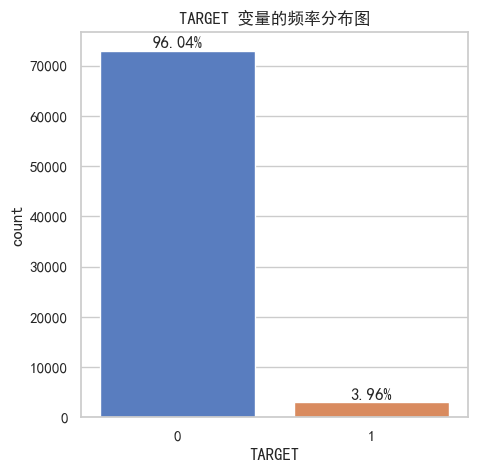

In [23]:
countplot_target(train)

我们可以看到数据分布极度不平衡，我们的目标是分辨出不满意客户，但是训练集中仅有3.96%的数据代表不满意客户，这为我们未来的模型和特征工程的决策提供了方向。

#### 3. 其余保留变量可视化

##### 查看前缀变量有什么

In [24]:
import re
[col for col in train.columns if col[:3] == 'var']

['var3', 'var15', 'var36', 'var38']

In [25]:
f_keywords = {col.split('_')[0] for col in train.columns if (len(col.split('_')) > 1) & ~('var15' in col)}
f_keywords

{'imp', 'ind', 'num', 'saldo'}

##### （1）var3变量

In [26]:
np.array(sorted(train.var3.unique()))

array([-999999,       0,       1,       2,       3,       4,       5,
             6,       7,       8,       9,      10,      11,      12,
            13,      14,      15,      16,      17,      18,      19,
            20,      21,      22,      23,      24,      25,      26,
            27,      28,      29,      30,      31,      32,      33,
            34,      35,      36,      38,      40,      41,      42,
            43,      44,      45,      46,      47,      48,      49,
            50,      51,      52,      53,      54,      55,      56,
            57,      58,      59,      60,      61,      62,      63,
            64,      65,      66,      68,      69,      71,      72,
            73,      74,      76,      77,      78,      79,      81,
            82,      84,      85,      86,      87,      88,      89,
            90,      91,      93,      94,      95,      96,      97,
            98,      99,     100,     101,     102,     103,     104,
           105,     

In [27]:
print("var3唯一值的数量为：%i" % (len(np.array(sorted(train.var3.unique())))))

var3唯一值的数量为：208


这里我们可以看出var3的唯一值是从0到238的一个连续的取值，这个数量和全世界的国家/地区数不谋而合，可以合理假设这个变量代表的意思是**国家或地区**，而其中的-999999可能是缺失值。

In [28]:
# 看一下训练集那一列的情况
print("值\t   计数") 
print(train['var3'].value_counts()[:5])
print("值\t   占比%")
print(train['var3'].value_counts()[:5]/train.shape[0]*100)

值	   计数
var3
 2         74165
 8           138
-999999      116
 9           110
 3           108
Name: count, dtype: int64
值	   占比%
var3
 2         97.559853
 8          0.181531
-999999     0.152591
 9          0.144699
 3          0.142068
Name: count, dtype: float64


In [29]:
# 看一下测试集那一列的情况
print("值\t   计数") 
print(test['var3'].value_counts()[:5])
print("值\t   占比%")
print(test['var3'].value_counts()[:5]/train.shape[0]*100)

值	   计数
var3
 2         73962
-999999      120
 8           116
 9           108
 13          107
Name: count, dtype: int64
值	   占比%
var3
 2         97.292818
-999999     0.157853
 8          0.152591
 9          0.142068
 13         0.140752
Name: count, dtype: float64


我们可以看到2在var3中是众数，这里用众数代替-999999的所有值。

In [30]:
train["var3"].replace(-999999, 2, inplace = True)
test["var3"].replace(-999999, 2, inplace = True)

查看是否操作完成

In [31]:
np.array(sorted(train.var3.unique()))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  38,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        68,  69,  71,  72,  73,  74,  76,  77,  78,  79,  81,  82,  84,
        85,  86,  87,  88,  89,  90,  91,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       156, 157, 158, 159, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 181, 182, 183, 184,
       185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 19

**数据可视化**
- 操作完成后我们看一看替换后的var3=2和≠2时训练集目标变量的分布。

满意客户的数量为 71328，不满意客户的数量为 2953


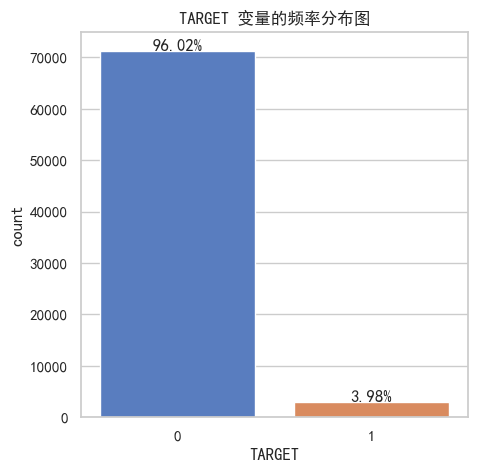

In [32]:
# var3=2
countplot_target(train[train['var3'] == 2], h=50)

满意客户的数量为 1684，不满意客户的数量为 55


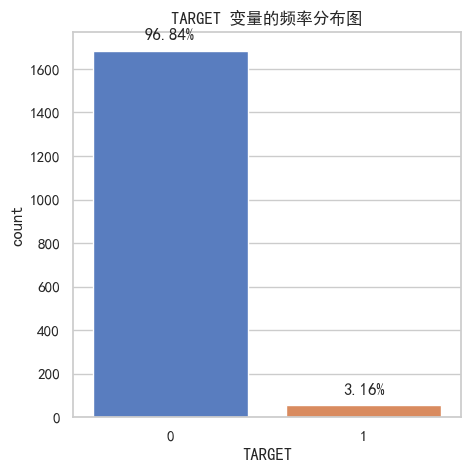

In [33]:
# var3≠2
countplot_target(train[train['var3'] != 2], h=50)

我们可以发现替换后并不改变数据的分布形状，所以**不用构造二值特征**，也同样证明了使用众数代替缺失值是合理的。

##### （2）var15变量

In [34]:
print("var15 最小值为：%i，最大值为：%i" % (train['var15'].min(), train['var15'].max()))

var15 最小值为：5，最大值为：105


In [35]:
np.array(sorted(train.var15.unique()))

array([  5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 104, 105], dtype=int64)

综合下面考虑，我们可以假设这个变量是客户的**年龄**。
- var15这个变量的值在5到105之间，
- 每10个唯一值都有，
- 没有断层，
- 且都是整数没有出现小数的现象。


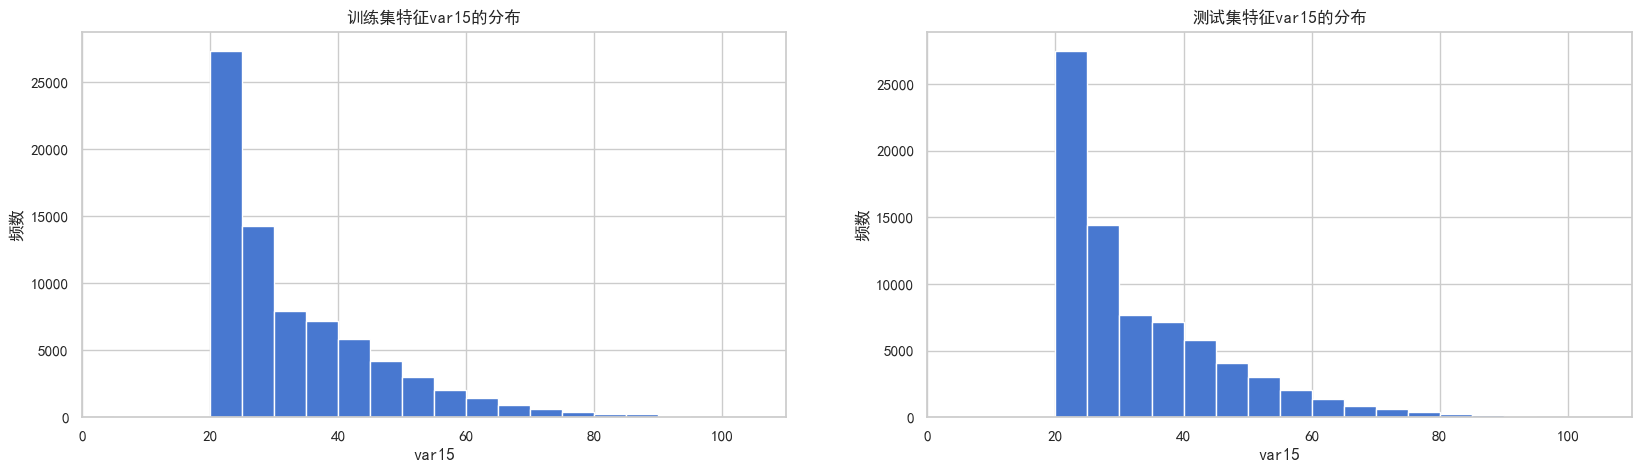

训练集中年龄在 30 岁以下的客户约占所有数据的 56.15%
测试集中年龄在 30 岁以下的客户约占所有数据的 56.58%


In [36]:
# 查看数据分布直方图
histplot_comb('var15')
print("训练集中年龄在 30 岁以下的客户约占所有数据的 %.2f%%" % (stats.percentileofscore(train['var15'].values, 30)))
print("测试集中年龄在 30 岁以下的客户约占所有数据的 %.2f%%" % (stats.percentileofscore(test['var15'].values, 30)))

由上图我们可以看出，训练集和测试集的分布类似，且客户中年轻人居多。

那么所有年轻人的满意情况如何？

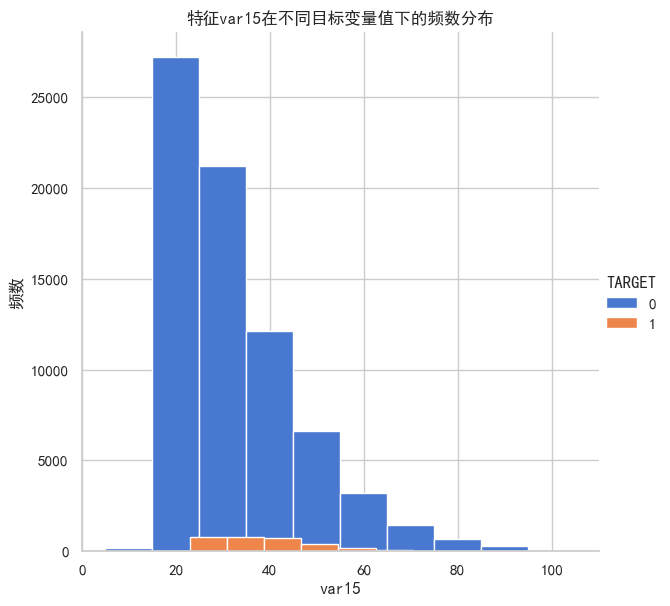

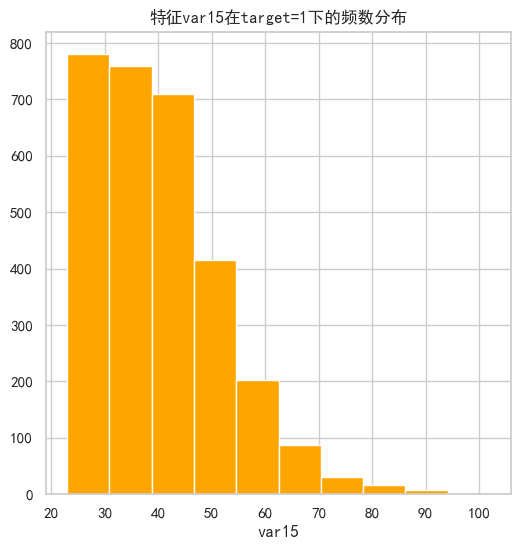

不满意客户的var15最小值为：23，不满意客户的var15最大值为：102


In [37]:
ax = histplot_target('var15', bins=10)

plt.figure(figsize=(6, 6))
mask = train[(train['TARGET'] == 1)]
plt.hist(mask['var15'], color='orange')
plt.title("特征var15在target=1下的频数分布")
plt.xlabel('var15')
plt.show()

print("不满意客户的var15最小值为：%i，不满意客户的var15最大值为：%i" % (mask['var15'].min(), mask['var15'].max()))

由上图可知：绝大部分不满意客户都在年龄段 (25, 45) 之间，其次是 (45, 65)，其他年龄分段不满意客户很少。我们可以根据这个性质作分分箱操作。

还可以得到，不满意客户的取值范围是23到102岁。而我们可以根据这个性质，构造一个二值特征。

简单构造特征：
- 二值特征：创建一个二值特征（0和1），其中1表示客户的年龄在23到102岁之间，0表示不在该区间。
- 等距分箱：由于题目是一个二分类问题，通过观察数据，我们应将数据等距分为3段。

In [38]:
# 构造二值特征
train['var15_0'] = train['var15'].apply(lambda x: 1 if 23 <= x <= 102 else 0)
test['var15_0'] = test['var15'].apply(lambda x: 1 if 23 <= x <= 102 else 0)

在等距分箱之前，我们设定的是3箱，然而箱不一定能准确的表示数据的分布，所以也可以4箱，5箱，6箱都试试。

In [39]:
# 等距分箱
_, bins = pd.cut(train['var15'].values, 5, retbins=True)
print(_)

[(4.9, 25.0], (25.0, 45.0], (4.9, 25.0], (25.0, 45.0], (25.0, 45.0], ..., (45.0, 65.0], (25.0, 45.0], (4.9, 25.0], (4.9, 25.0], (45.0, 65.0]]
Length: 76020
Categories (5, interval[float64, right]): [(4.9, 25.0] < (25.0, 45.0] < (45.0, 65.0] < (65.0, 85.0] < (85.0, 105.0]]


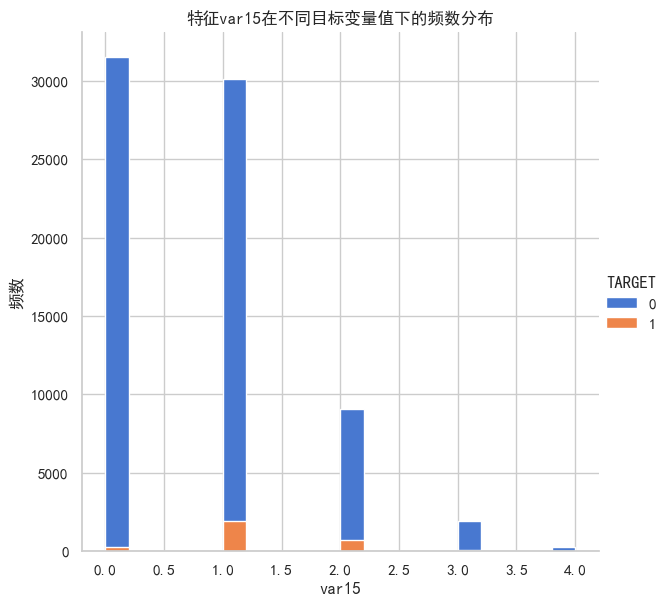

In [40]:
train['var15'] = pd.cut(train['var15'].values, bins, labels=False)
test['var15'] = pd.cut(test['var15'].values, bins, labels=False)
histplot_target('var15')

经过认为测试，这里选择分为5箱，最能体现数据的分布特点。

In [41]:
# 检查是否构造成功
train.shape , test.shape

((76020, 106), (75818, 105))

##### （3）var38变量

In [42]:
print("var38 最小值为：%.3f，最大值为：%.3f" % (train['var38'].min(), train['var38'].max()))
train.var38.value_counts()

var38 最小值为：5163.750，最大值为：22034738.760


var38
117310.979016    14868
451931.220000       16
463625.160000       12
288997.440000       11
104563.800000       11
                 ...  
89665.500000         1
45876.570000         1
151505.640000        1
74548.170000         1
84278.160000         1
Name: count, Length: 57736, dtype: int64

从上面看，我们得不到任何信息来假设这个变量的实际含义。由于有一个值有极高的频数，那么可以看看百分位数。

In [43]:
for i in np.arange(0, 1.1, 0.1):
    print('%i percentile : %i' % (i*100, np.quantile(train.var38.values, i)))

0 percentile : 5163
10 percentile : 48070
20 percentile : 61496
30 percentile : 74152
40 percentile : 88571
50 percentile : 106409
60 percentile : 117310
70 percentile : 117310
80 percentile : 132859
90 percentile : 182585
100 percentile : 22034738


0 和 10 %有一个巨大的跳跃，90% 和 100%也一样。

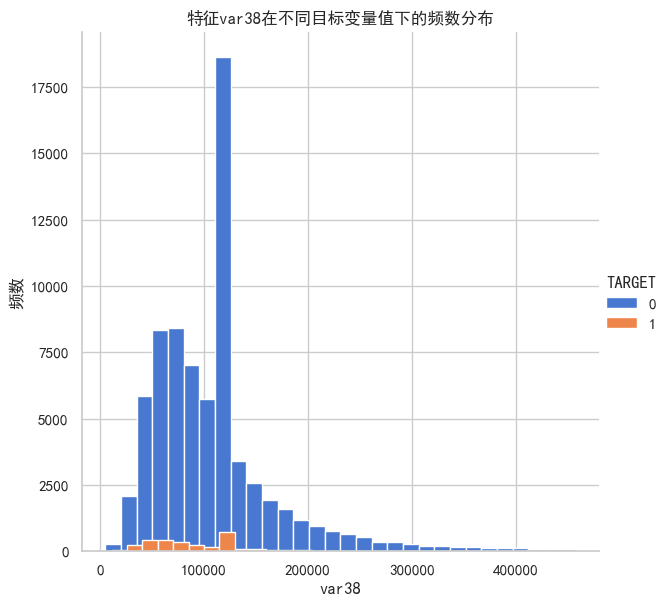

In [44]:
# 查看var38的频数分布情况，最大值太大，仅展示99%的数据
mask = train[train['var38'] <= np.quantile(train.var38.values, 0.99)]
histplot_target('var38', df=mask, bins=30)

我们可以看到在100000右边有一个很高的峰值，而整体数据呈右偏分布，可以用对数转换使其接近正态分布，为后面的模型算法打下基础。

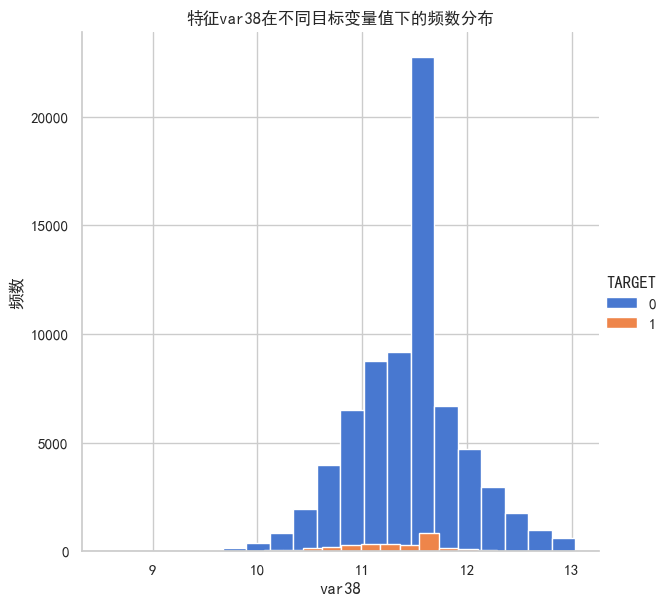

In [45]:
# 对数转换
mask['var38'] = np.log(mask.var38).values
histplot_target('var38', df=mask, bins=20)

经过对数变换后，分布更加接近正态分布，所以我们应用对数转换到var38。

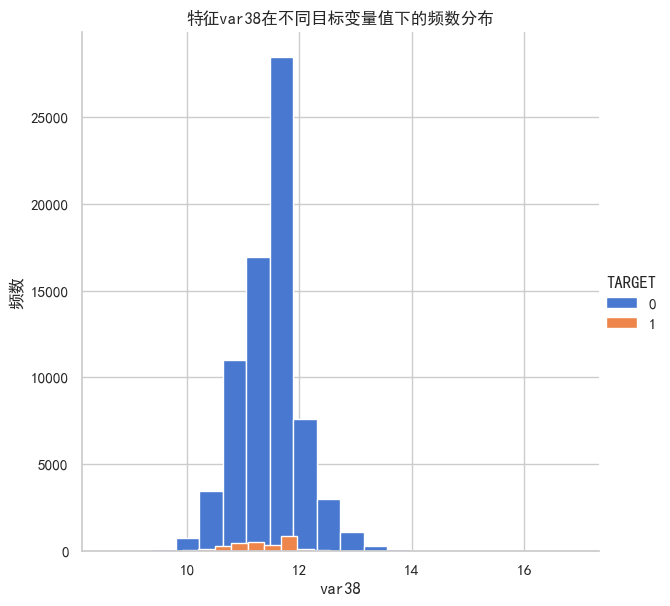

In [46]:
for df in [train, test]:
    df['var38'] = np.log(df['var38']).values
histplot_target('var38', bins=20)

##### （4）var36变量

In [47]:
train.var36.value_counts()

var36
99    30064
3     22177
1     14664
2      8704
0       411
Name: count, dtype: int64

因为特征var36所以可以不用对其转换。

##### 其余四个前缀特征

其他前缀的特征，有四类：imp, ind, num, saldo.

In [48]:
# 计算每种关键词前缀特征的计数
f_keywords = dict(zip(f_keywords, np.zeros(len(f_keywords), dtype=int)))
for key in f_keywords.keys():
    for col in train.columns:
        if key in col:
            f_keywords[key] += 1
f_keywords

{'imp': 13, 'saldo': 15, 'num': 50, 'ind': 21}

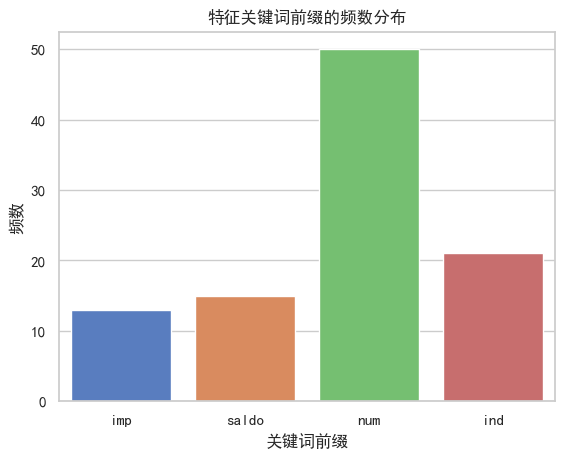

In [49]:
k = pd.Series(f_keywords)
ax = sns.barplot(x=k.index, y=k.values)
plt.title("特征关键词前缀的频数分布")
plt.ylabel('频数')
plt.xlabel('关键词前缀')
plt.show()

##### 关键词前缀 **imp** 的特征

In [50]:
imp = [col for col in train.columns if 'imp' in col]
print("关键词前缀imp特征共有 %i 个" % (len(imp)))
imp

关键词前缀imp特征共有 13 个


['imp_ent_var16_ult1',
 'imp_op_var39_comer_ult1',
 'imp_op_var39_comer_ult3',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult1',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_var43_emit_ult1',
 'imp_trans_var37_ult1']

- 我们从这13个中随机挑选一个进行探索性分析。

In [51]:
random.seed(a=0) 
print("被随机选择中的imp特征：%s" % (random.sample(imp, 1)))

被随机选择中的imp特征：['imp_op_var41_efect_ult3']


- **imp_op_var41_efect_ult3**

In [52]:
col = 'imp_op_var41_efect_ult3'
print("训练集中 imp_op_var41_efect_ult3 最小值为：%i，最大值为：%i" % (train[col].min(), train[col].max()))
print("测试集中 imp_op_var41_efect_ult3 最小值为：%i，最大值为：%i" % (test[col].min(), test[col].max()))

训练集中 imp_op_var41_efect_ult3 最小值为：0，最大值为：131100
测试集中 imp_op_var41_efect_ult3 最小值为：0，最大值为：67950


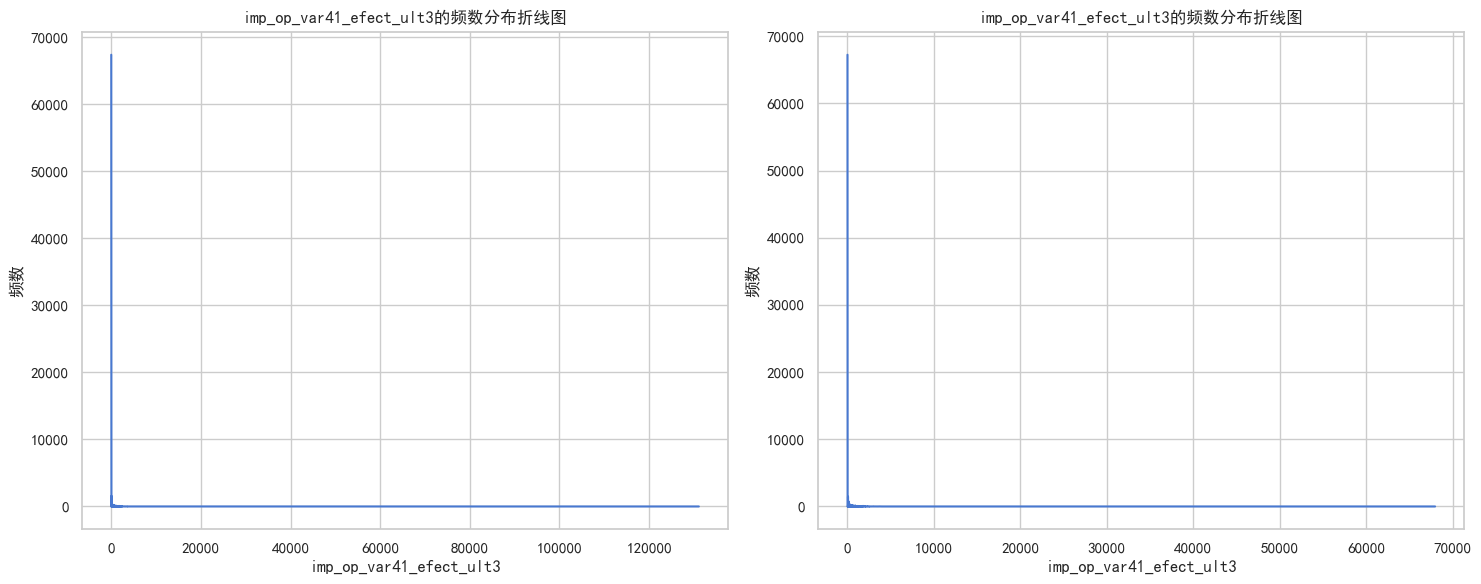

****************************************************************************************************
训练集特征'imp_op_var41_efect_ult3'其值占比（top 5）：
值	 占比%
imp_op_var41_efect_ult3
0.0      88.624046
60.0      2.065246
120.0     0.912918
180.0     0.463036
240.0     0.367009
Name: count, dtype: float64
****************************************************************************************************
训练集特征'imp_op_var41_efect_ult3'其值占比（bottom 5）：
值	 占比%
imp_op_var41_efect_ult3
9420.0     0.001315
326.7      0.001315
15240.0    0.001315
9000.0     0.001315
315.0      0.001315
Name: count, dtype: float64
****************************************************************************************************
测试集特征'imp_op_var41_efect_ult3'其值占比（top 5）：
值	 占比%
imp_op_var41_efect_ult3
0.0      88.679469
60.0      1.933578
120.0     1.006357
180.0     0.484054
300.0     0.378538
Name: count, dtype: float64
**************************************************************************************************

In [53]:
# 绘制特定列的频数分布折线图
valuecounts_plot(train=train, test=test, col=col)

- 由上图可以得到这个变量88%的训练集和测试集数据都是0。

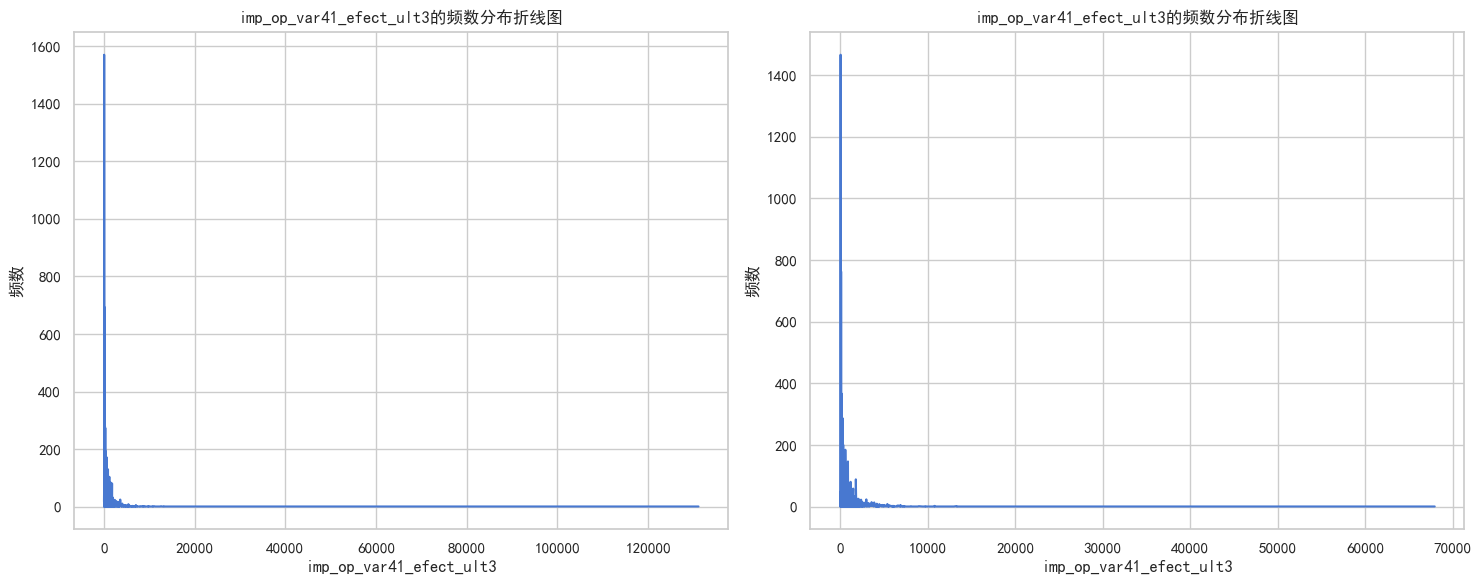

****************************************************************************************************
训练集特征'imp_op_var41_efect_ult3'其值占比（top 5）：
值	 占比%
imp_op_var41_efect_ult3
60.0     18.154487
120.0     8.024977
180.0     4.070305
240.0     3.226179
300.0     3.168363
Name: count, dtype: float64
****************************************************************************************************
训练集特征'imp_op_var41_efect_ult3'其值占比（bottom 5）：
值	 占比%
imp_op_var41_efect_ult3
9420.0     0.011563
326.7      0.011563
15240.0    0.011563
9000.0     0.011563
315.0      0.011563
Name: count, dtype: float64
****************************************************************************************************
测试集特征'imp_op_var41_efect_ult3'其值占比（top 5）：
值	 占比%
imp_op_var41_efect_ult3
60.0     17.080275
120.0     8.889666
180.0     4.275894
300.0     3.343819
240.0     3.134102
Name: count, dtype: float64
**************************************************************************************************

In [54]:
valuecounts_plot(train=train[train[col] != 0], test=test[test[col] != 0], col=col)

- 把0去除掉看其他值，训练集和测试集数据类似，整体呈右偏分布。所以我们也进行对不等于0的部分对数变换。

In [55]:
df = train[train[col] != 0]
df1 = test[test[col] != 0]
for data in [df, df1]:
    data.loc[data[col] != 0, col] = np.log(data.loc[data[col] != 0, col])

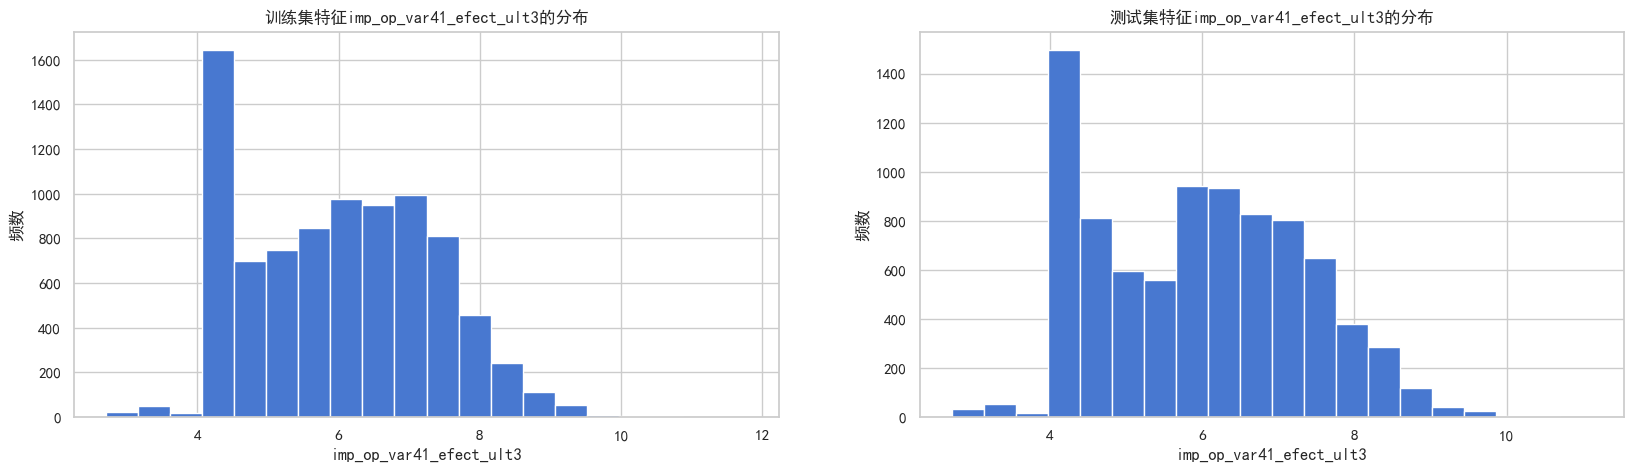

In [56]:
histplot_comb(col, train=df, test=df1)

- 当特征 imp_op_var41_efect_ult3 不为0时，经过对数变换，训练集和测试集数据均近似服从正态分布。

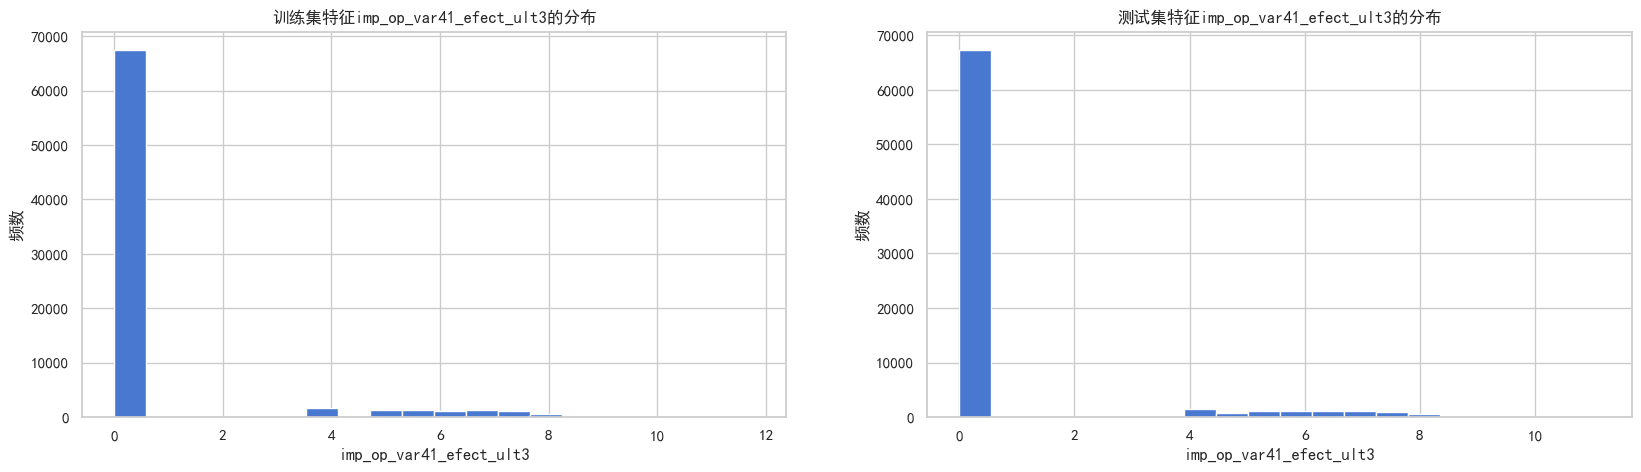

In [57]:
for df in [train, test]:
    df.loc[df[col] != 0, col] = np.log(df.loc[df[col] != 0, col])
histplot_comb(col, train=train, test=test)

- 其他 imp 特征也具有类似分布规律。因此，**针对imp特征均做以下处理：零值不作处理，将其他值对数变换。**（此操作在下面部分统一完成）

##### 关键词前缀 **saldo** 的特征

In [58]:
saldo = [col for col in train.columns if 'saldo' in col]
print("关键词前缀saldo特征共有 %i 个" % (len(saldo)))
saldo

关键词前缀saldo特征共有 15 个


['saldo_var5',
 'saldo_var12',
 'saldo_var13_corto',
 'saldo_var13',
 'saldo_var30',
 'saldo_var37',
 'saldo_var42',
 'saldo_medio_var5_hace2',
 'saldo_medio_var5_hace3',
 'saldo_medio_var5_ult1',
 'saldo_medio_var5_ult3',
 'saldo_medio_var12_ult1',
 'saldo_medio_var12_ult3',
 'saldo_medio_var13_corto_ult1',
 'saldo_medio_var13_corto_ult3']

In [59]:
random.seed(a=77) 
print("被随机选择中的saldo特征：%s" % (random.sample(saldo, 1)))

被随机选择中的saldo特征：['saldo_medio_var12_ult3']


- **saldo_medio_var12_ult3**

In [60]:
col = 'saldo_medio_var12_ult3'
print("训练集中 saldo_medio_var12_ult3 最小值为：%i，最大值为：%i" % (train[col].min(), train[col].max()))
print("测试集中 saldo_medio_var12_ult3 最小值为：%i，最大值为：%i" % (test[col].min(), test[col].max()))

训练集中 saldo_medio_var12_ult3 最小值为：0，最大值为：2272859
测试集中 saldo_medio_var12_ult3 最小值为：0，最大值为：3002214


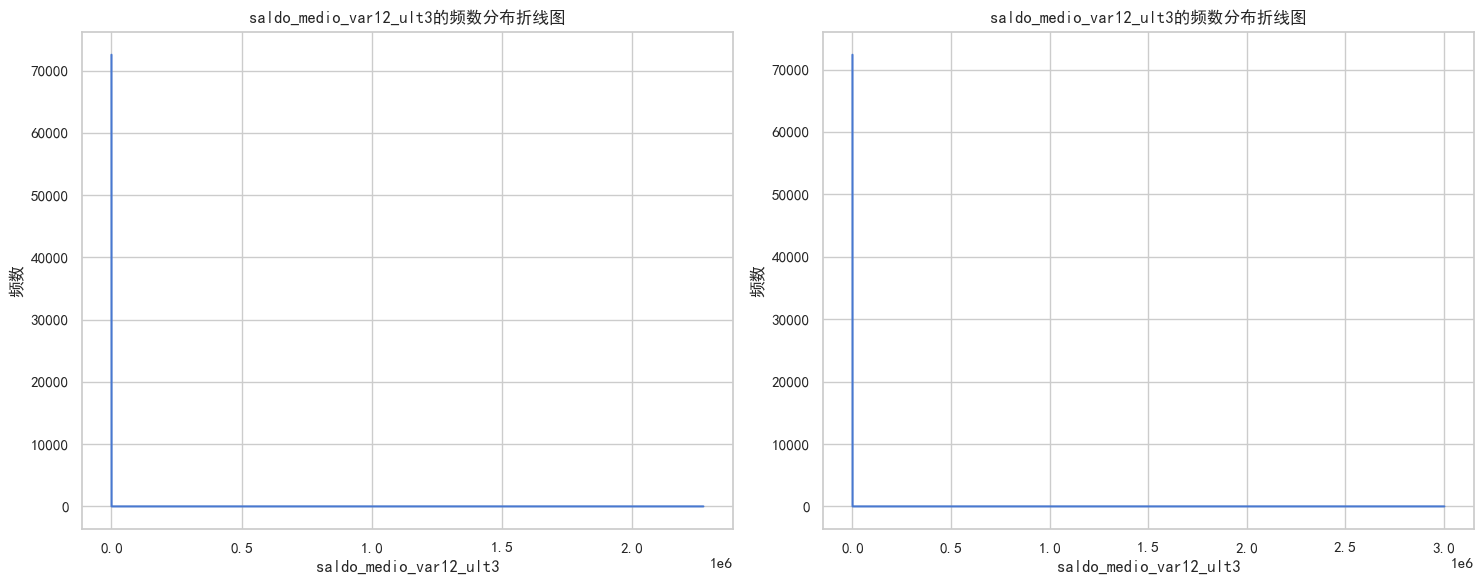

****************************************************************************************************
训练集特征'saldo_medio_var12_ult3'其值占比（top 5）：
值	 占比%
saldo_medio_var12_ult3
0.00        95.427519
75.03        0.003946
17600.01     0.002631
18733.47     0.002631
23475.66     0.002631
Name: count, dtype: float64
****************************************************************************************************
训练集特征'saldo_medio_var12_ult3'其值占比（bottom 5）：
值	 占比%
saldo_medio_var12_ult3
39559.80     0.001315
23090.34     0.001315
4285.74      0.001315
208725.45    0.001315
31837.02     0.001315
Name: count, dtype: float64
****************************************************************************************************
测试集特征'saldo_medio_var12_ult3'其值占比（top 5）：
值	 占比%
saldo_medio_var12_ult3
0.00         95.448310
800000.01     0.005276
120.00        0.002638
1741.95       0.002638
3.09          0.002638
Name: count, dtype: float64
***********************************************************

In [61]:
# 绘制特定列的频数分布折线图
valuecounts_plot(train=train, test=test, col=col)

- 绘制训练集和测试集中 saldo_medio_var12_ult3 的频数分布图，我们可以看到约 95% 的训练和测试数据值都为 0。

- 所以我们采取和imp变量同样的操作，绘制不考虑 0（最常见的值）时 saldo_medio_var12_ult3 的频数分布图。

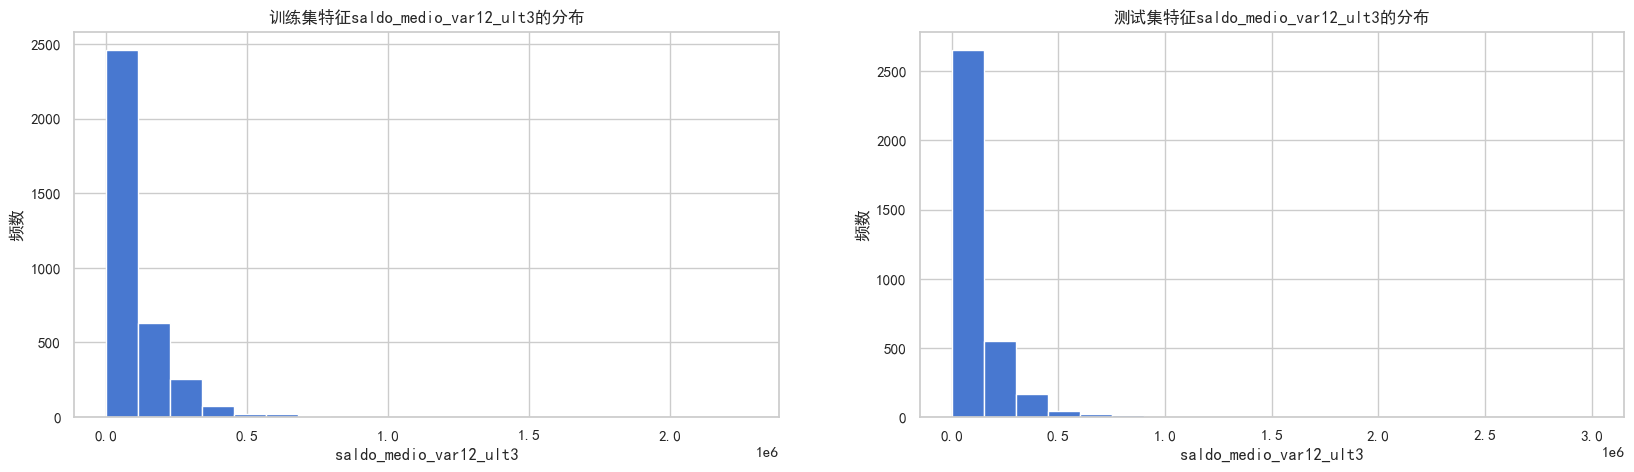

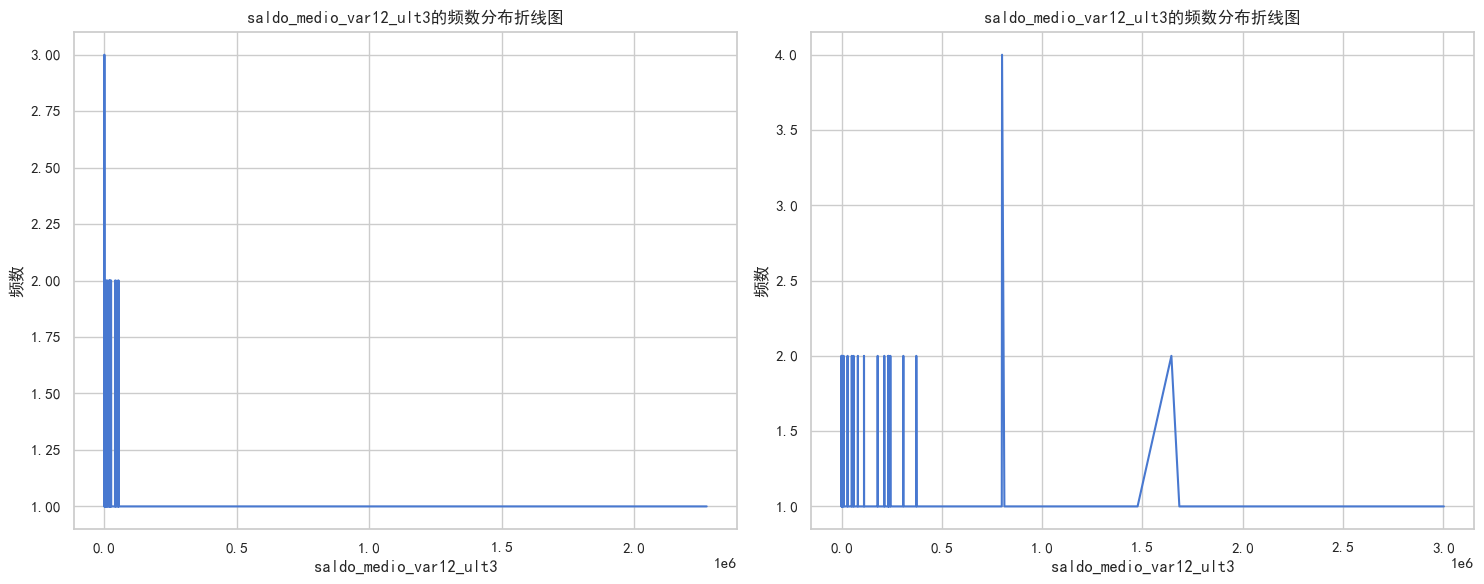

****************************************************************************************************
训练集特征'saldo_medio_var12_ult3'其值占比（top 5）：
值	 占比%
saldo_medio_var12_ult3
75.03       0.086306
1968.84     0.057537
8709.69     0.057537
13.98       0.057537
53823.69    0.057537
Name: count, dtype: float64
****************************************************************************************************
训练集特征'saldo_medio_var12_ult3'其值占比（bottom 5）：
值	 占比%
saldo_medio_var12_ult3
23090.34     0.028769
4285.74      0.028769
208725.45    0.028769
104290.62    0.028769
31837.02     0.028769
Name: count, dtype: float64
****************************************************************************************************
测试集特征'saldo_medio_var12_ult3'其值占比（top 5）：
值	 占比%
saldo_medio_var12_ult3
800000.01    0.115908
2900.01      0.057954
213060.39    0.057954
1741.95      0.057954
234706.44    0.057954
Name: count, dtype: float64
*********************************************************************

In [62]:
histplot_comb(col, train[train[col] != 0], test[test[col] != 0])
valuecounts_plot(train=train[train[col] != 0], test=test[test[col] != 0], col=col)

- 训练集和测试集的数据分布极为相似，整体呈现右偏分布，同样对其进行对数变换。

In [63]:
df = train[train[col] != 0]
df1 = test[test[col] != 0]
for data in [df, df1]:
    data.loc[data[col] != 0, col] = np.log(data.loc[data[col] != 0, col])

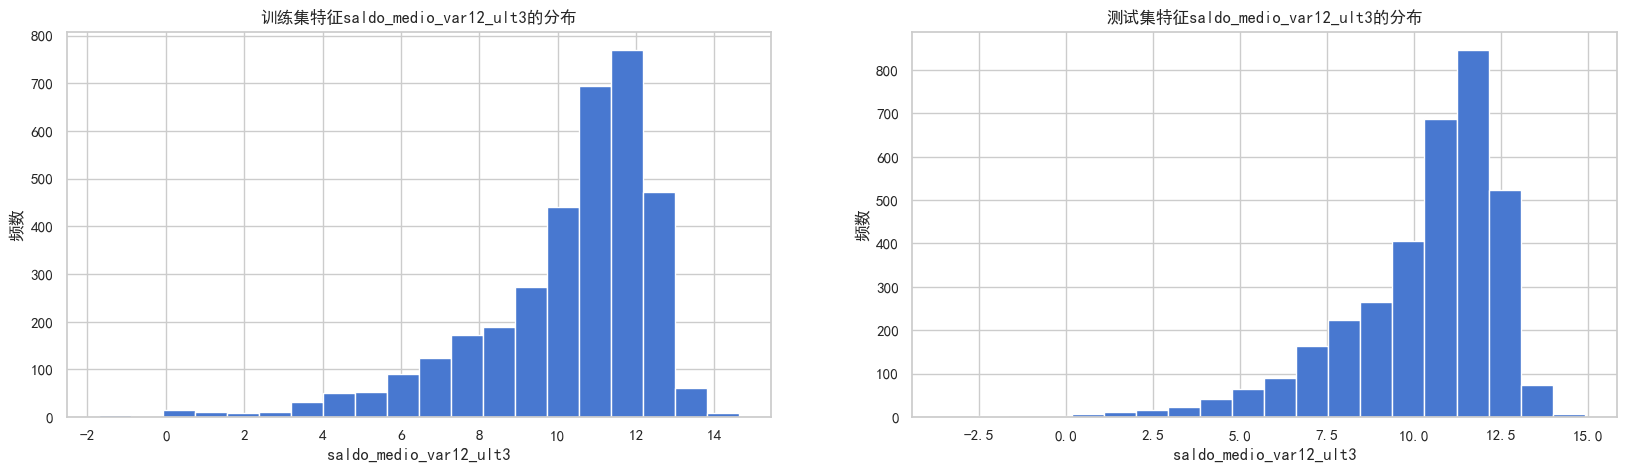

In [64]:
histplot_comb(col, train=df, test=df1)

- 当特征 saldo_medio_var12_ult3 不为0时，经过对数变换，训练集和测试集数据均近似服从正态分布。

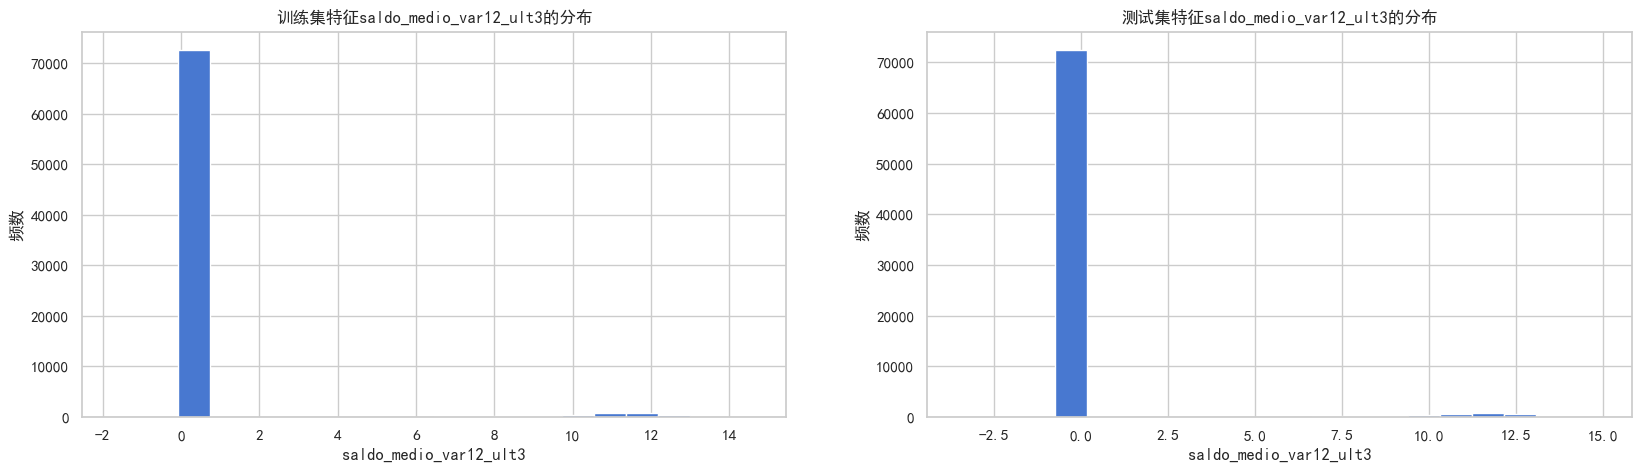

In [65]:
for df in [train, test]:
    df.loc[df[col] != 0, col] = np.log(df.loc[df[col] != 0, col])
histplot_comb(col, train=train, test=test)

其他 saldo 特征也具有类似分布规律。同样的操作：零值不作处理，将其他值对数变换。（后面实现）

##### 关键词前缀 **num** 的特征

In [66]:
num = [col for col in train.columns if 'num' in col]
print("关键词前缀num特征共有 %i 个" % (len(num)))
num[:10]

关键词前缀num特征共有 50 个


['num_var4',
 'num_var5_0',
 'num_var5',
 'num_var12_0',
 'num_var12',
 'num_var13_0',
 'num_var13_corto_0',
 'num_var13_corto',
 'num_var13',
 'num_var24_0']

In [67]:
random.seed(a=435) 
print("被随机选择中的num特征：%s" % (random.sample(num, 1)))

被随机选择中的num特征：['num_op_var41_ult3']


- **num_op_var41_ult3**

In [68]:
col = 'num_op_var41_ult3'
print("训练集中 num_op_var41_ult3 最小值为：%i，最大值为：%i" % (train[col].min(), train[col].max()))
print("测试集中 num_op_var41_ult3 最小值为：%i，最大值为：%i" % (test[col].min(), test[col].max()))

训练集中 num_op_var41_ult3 最小值为：0，最大值为：468
测试集中 num_op_var41_ult3 最小值为：0，最大值为：489


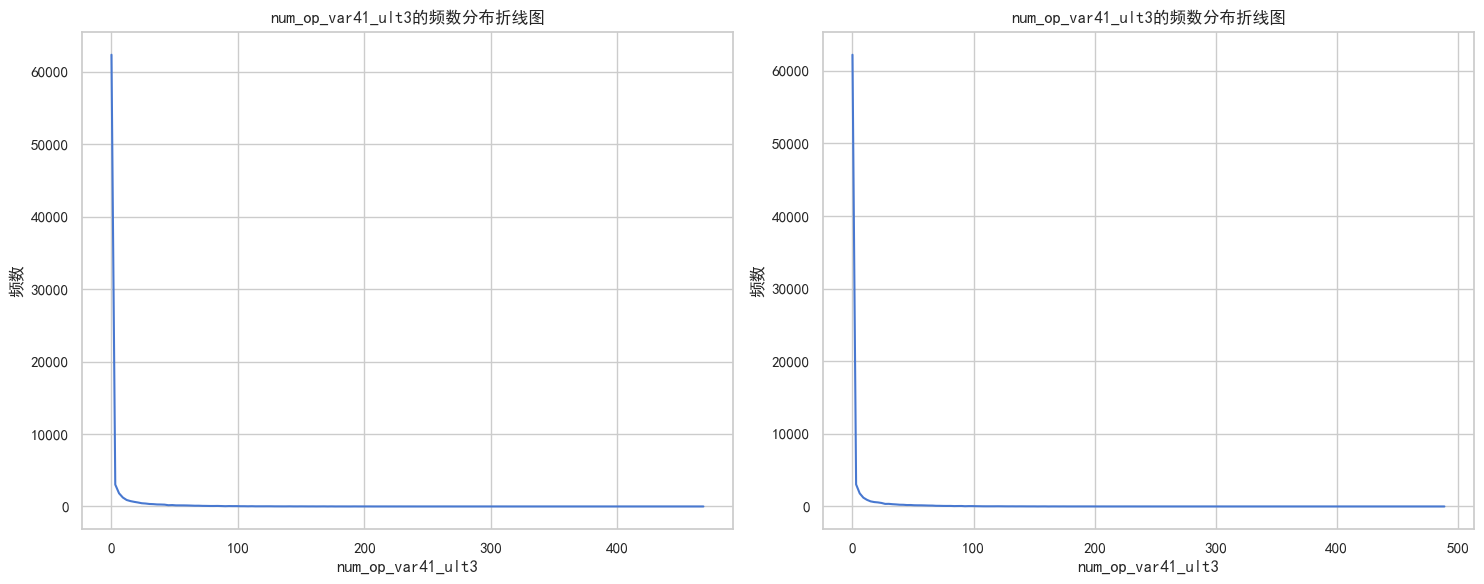

****************************************************************************************************
训练集特征'num_op_var41_ult3'其值占比（top 5）：
值	 占比%
num_op_var41_ult3
0     82.024467
3      3.977901
6      2.388845
9      1.627203
12     1.178637
Name: count, dtype: float64
****************************************************************************************************
训练集特征'num_op_var41_ult3'其值占比（bottom 5）：
值	 占比%
num_op_var41_ult3
363    0.001315
258    0.001315
318    0.001315
291    0.001315
468    0.001315
Name: count, dtype: float64
****************************************************************************************************
测试集特征'num_op_var41_ult3'其值占比（top 5）：
值	 占比%
num_op_var41_ult3
0     82.033290
3      4.006964
6      2.375425
9      1.599884
12     1.201562
Name: count, dtype: float64
****************************************************************************************************
测试集特征'num_op_var41_ult3'其值占比（bottom 5）：
值	 占比%
num_op_var41_ult3
258    0.001319
28

In [69]:
valuecounts_plot(train=train, test=test, col=col)

- 通过观察和合理的推断，所有的值都是3的倍数，这个num应该是一个分类特征。下面我们看看唯一值的情况。

In [70]:
for feat in num:
    print("%s \t unique-values:%i \t dtype:%s" % (feat, train[feat].nunique(), train[feat].dtype))

num_var4 	 unique-values:8 	 dtype:int64
num_var5_0 	 unique-values:5 	 dtype:int64
num_var5 	 unique-values:5 	 dtype:int64
num_var12_0 	 unique-values:6 	 dtype:int64
num_var12 	 unique-values:4 	 dtype:int64
num_var13_0 	 unique-values:7 	 dtype:int64
num_var13_corto_0 	 unique-values:3 	 dtype:int64
num_var13_corto 	 unique-values:3 	 dtype:int64
num_var13 	 unique-values:7 	 dtype:int64
num_var24_0 	 unique-values:4 	 dtype:int64
num_op_var41_hace2 	 unique-values:51 	 dtype:int64
num_op_var41_ult1 	 unique-values:68 	 dtype:int64
num_op_var41_ult3 	 unique-values:96 	 dtype:int64
num_op_var39_hace2 	 unique-values:50 	 dtype:int64
num_op_var39_ult1 	 unique-values:71 	 dtype:int64
num_op_var39_ult3 	 unique-values:99 	 dtype:int64
num_var30_0 	 unique-values:11 	 dtype:int64
num_var30 	 unique-values:9 	 dtype:int64
num_var35 	 unique-values:13 	 dtype:int64
num_var37_med_ult2 	 unique-values:21 	 dtype:int64
num_var37 	 unique-values:22 	 dtype:int64
num_var39_0 	 unique-values:

- 最大的唯一值是172，如果设定172类还是不合理，但是我们可以设定一个更小的类别，这里设定唯一值小于10个的，把他们进行编码处理，转化为分类数据。

- 分类转化

In [71]:
threshold = 10

# 选择以'num'为前缀的列
num_features = train.filter(like='num')

# 计算每个数值特征的唯一值数量
unique_values_count = num_features.nunique()

# 找出唯一值数量小于或等于阈值的特征
features_to_convert = unique_values_count[unique_values_count <= threshold].index

# 将这些特征转换为分类特征
for feature in features_to_convert:
    train[feature] = train[feature].astype('category')

# 查看转换后的DataFrame的列类型
print(train["num_var4"].dtypes)


category


In [72]:
# 设置阈值
threshold = 10

# 选择以'num'为前缀的列
num_features = test.filter(like='num')

# 计算每个数值特征的唯一值数量
unique_values_count = num_features.nunique()

# 找出唯一值数量小于或等于阈值的特征
features_to_convert = unique_values_count[unique_values_count <= threshold].index

# 将这些特征转换为分类特征
for feature in features_to_convert:
    test[feature] = test[feature].astype('category')

In [73]:
for feat in num:
    print("%s \t unique-values:%i \t dtype:%s" % (feat, train[feat].nunique(), train[feat].dtype))

num_var4 	 unique-values:8 	 dtype:category
num_var5_0 	 unique-values:5 	 dtype:category
num_var5 	 unique-values:5 	 dtype:category
num_var12_0 	 unique-values:6 	 dtype:category
num_var12 	 unique-values:4 	 dtype:category
num_var13_0 	 unique-values:7 	 dtype:category
num_var13_corto_0 	 unique-values:3 	 dtype:category
num_var13_corto 	 unique-values:3 	 dtype:category
num_var13 	 unique-values:7 	 dtype:category
num_var24_0 	 unique-values:4 	 dtype:category
num_op_var41_hace2 	 unique-values:51 	 dtype:int64
num_op_var41_ult1 	 unique-values:68 	 dtype:int64
num_op_var41_ult3 	 unique-values:96 	 dtype:int64
num_op_var39_hace2 	 unique-values:50 	 dtype:int64
num_op_var39_ult1 	 unique-values:71 	 dtype:int64
num_op_var39_ult3 	 unique-values:99 	 dtype:int64
num_var30_0 	 unique-values:11 	 dtype:int64
num_var30 	 unique-values:9 	 dtype:category
num_var35 	 unique-values:13 	 dtype:int64
num_var37_med_ult2 	 unique-values:21 	 dtype:int64
num_var37 	 unique-values:22 	 dtype:i

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 106 entries, ID to var15_0
dtypes: category(19), float64(29), int64(58)
memory usage: 51.8 MB


In [75]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75818 entries, 0 to 75817
Columns: 105 entries, ID to var15_0
dtypes: category(19), float64(29), int64(57)
memory usage: 51.1 MB


- 上面检查已成功把他们变成分类变量。

##### 关键词前缀 **ind** 的特征

In [76]:
ind = [col for col in train.columns if 'ind' in col]
print("关键词前缀ind特征共有 %i 个" % (len(ind)))
ind[:10]

关键词前缀ind特征共有 21 个


['ind_var5_0',
 'ind_var5',
 'ind_var12_0',
 'ind_var12',
 'ind_var13_0',
 'ind_var13_corto_0',
 'ind_var13_corto',
 'ind_var13',
 'ind_var24_0',
 'ind_var30_0']

In [77]:
random.seed(a=435) 
print("被随机选择中的ind特征：%s" % (random.sample(ind, 1)))

被随机选择中的ind特征：['ind_var13_corto']


- **ind_var13_corto**

In [78]:
col = 'ind_var13_corto'
print("训练集中 ind_var13_corto 最小值为：%i，最大值为：%i" % (train[col].min(), train[col].max()))
print("测试集中 ind_var13_corto 最小值为：%i，最大值为：%i" % (test[col].min(), test[col].max()))

训练集中 ind_var13_corto 最小值为：0，最大值为：1
测试集中 ind_var13_corto 最小值为：0，最大值为：1


- 绘制训练集和测试集中特征 ind_var13_corto 的频数分布折线图和统计唯一值的计数。

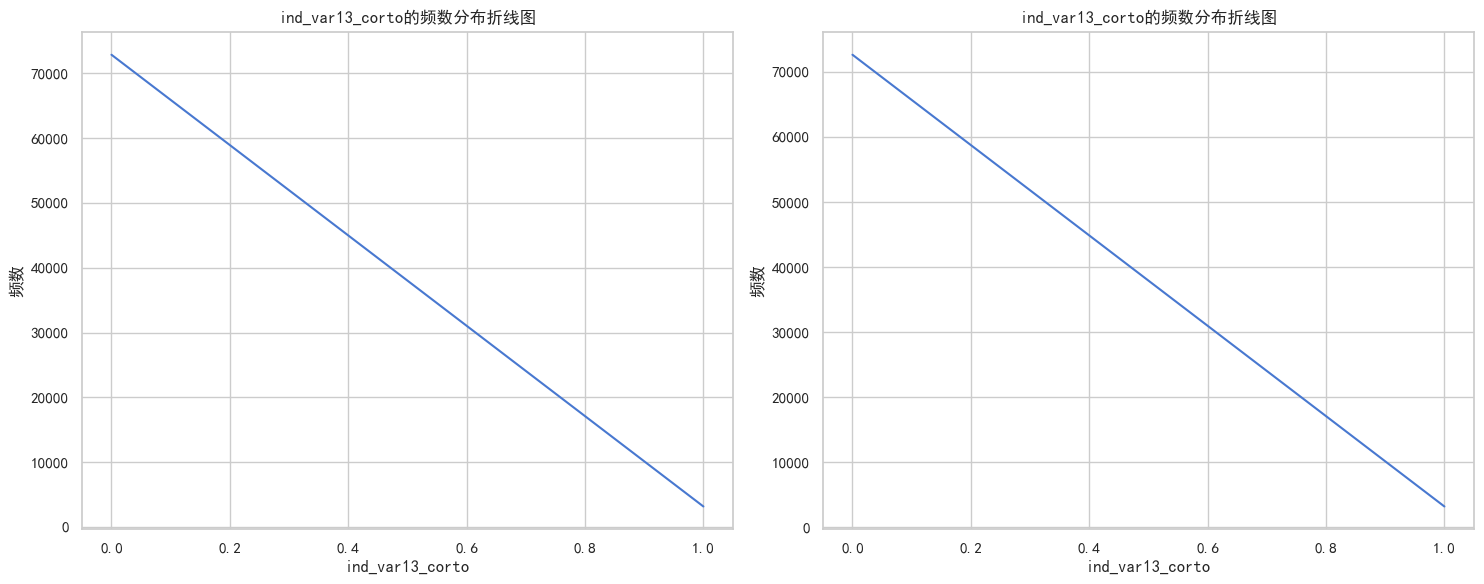

****************************************************************************************************
训练集特征'ind_var13_corto'其值占比（top 5）：
值	 占比%
ind_var13_corto
0    95.852407
1     4.147593
Name: count, dtype: float64
****************************************************************************************************
训练集特征'ind_var13_corto'其值占比（bottom 5）：
值	 占比%
ind_var13_corto
0    95.852407
1     4.147593
Name: count, dtype: float64
****************************************************************************************************
测试集特征'ind_var13_corto'其值占比（top 5）：
值	 占比%
ind_var13_corto
0    95.784642
1     4.215358
Name: count, dtype: float64
****************************************************************************************************
测试集特征'ind_var13_corto'其值占比（bottom 5）：
值	 占比%
ind_var13_corto
0    95.784642
1     4.215358
Name: count, dtype: float64


In [79]:
valuecounts_plot(train=train, test=test, col=col)

- 此特征只有 2 个唯一值 0 和 1，并且 0 占比绝大部分，约为96%。

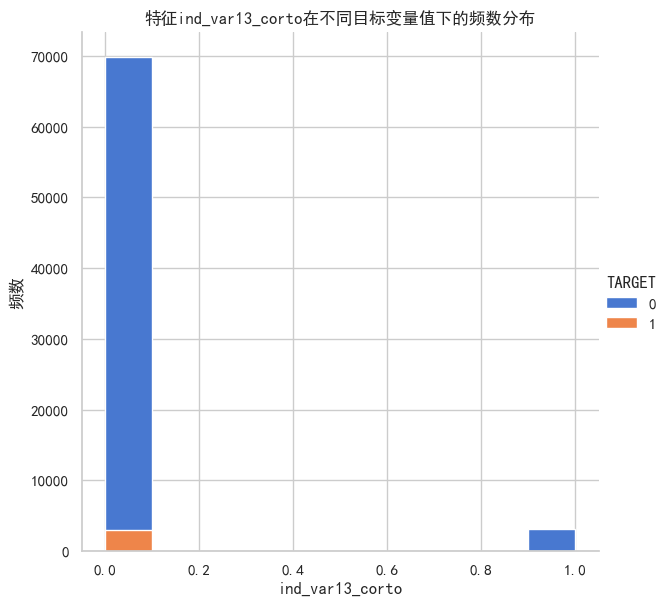

当 'ind_var13_corto'==0 时，不满意客户数量为：2985，其占比为：4.097%
当 'ind_var13_corto'==1 时，不满意客户数量为：23，其占比为：0.729%


In [80]:
histplot_target(col=col, bins=10)
for i in train[col].unique():
    print("当 '%s'==%i 时，不满意客户数量为：%i，其占比为：%.3f%%" %
          (col, i,  train[(train['TARGET'] == 1) & (train[col] == i)].shape[0],
           train[(train['TARGET'] == 1) & (train[col] == i)].shape[0]*100 / train[train[col] == i].shape[0]))

- 其他ind特征含有的唯一值个数和数据类型。

In [81]:
for feat in ind:
    print("%s \t unique-values:%i \t dtype:%s" % (feat, train[feat].nunique(), train[feat].dtype))

ind_var5_0 	 unique-values:2 	 dtype:int64
ind_var5 	 unique-values:2 	 dtype:int64
ind_var12_0 	 unique-values:2 	 dtype:int64
ind_var12 	 unique-values:2 	 dtype:int64
ind_var13_0 	 unique-values:2 	 dtype:int64
ind_var13_corto_0 	 unique-values:2 	 dtype:int64
ind_var13_corto 	 unique-values:2 	 dtype:int64
ind_var13 	 unique-values:2 	 dtype:int64
ind_var24_0 	 unique-values:2 	 dtype:int64
ind_var30_0 	 unique-values:2 	 dtype:int64
ind_var30 	 unique-values:2 	 dtype:int64
ind_var37_cte 	 unique-values:2 	 dtype:int64
ind_var37 	 unique-values:2 	 dtype:int64
ind_var39_0 	 unique-values:2 	 dtype:int64
ind_var41_0 	 unique-values:2 	 dtype:int64
ind_var10_ult1 	 unique-values:2 	 dtype:int64
ind_var10cte_ult1 	 unique-values:2 	 dtype:int64
ind_var9_cte_ult1 	 unique-values:2 	 dtype:int64
ind_var9_ult1 	 unique-values:2 	 dtype:int64
ind_var43_emit_ult1 	 unique-values:2 	 dtype:int64
ind_var43_recib_ult1 	 unique-values:2 	 dtype:int64


所有ind特征都具有2个唯一值 0 和 1。因此，**不对ind特征作任何处理。**

### 清洗完毕，保存数据

In [82]:
train.shape, test.shape

((76020, 106), (75818, 105))

In [83]:
train.to_csv('train_cleanned.csv', index=False)
test.to_csv('test_cleanned.csv', index=False)